In [49]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [50]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # petal length, petal width
y = (iris['target'] == 2).astype(np.float64) #Iris-Virginica

In [42]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("liner_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

/home/sabinadhikari/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('liner_svc', LinearSVC(C=1, loss='hinge'))])

In [43]:
svm_clf.predict([[5.5, 1.7]])

ValueError: X has 2 features, but StandardScaler is expecting 64 features as input.

# NonLinear Classifications

In [44]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))

])

polynomial_svm_clf.fit(X, y)

In [52]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

# EXercise

## 2. What are support vector?
## support vectors are the data points which are nearer to the hyperplane and influence the actual
## orientation of the hyperplane

In [1]:
# Train a LinearSVC on a lnearly separable dataset. Then train an SVC and a SGDClassifier
# on the same dataset. See if you can get them to produce roughly the same model.
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

In [2]:
data = datasets.load_breast_cancer()

In [3]:
# feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
# feature values
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
# target values
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
# target names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
data.data.shape

(569, 30)

In [8]:
X = data.data # feature values
y = data.target # labels

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
linear_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss='hinge', random_state=42))])

linear_svm_clf.fit(X_train, y_train)
# linear_svc_clf = LinearSVC(C = 1, loss = 'hinge', max_iter = 10000000)
# linear_svc_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [11]:
X_test_scaled = StandardScaler().fit_transform(X_test)

In [12]:
predictions = linear_svm_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print("LinearSVC (C=1, Loss='hinge') accuracy: {:.3f}"
     .format(accuracy_score(y_test, predictions)))

LinearSVC (C=1, Loss='hinge') accuracy: 0.972


In [14]:
# Using SGDClassifier
sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier(random_state=42))
])

sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd_clf', SGDClassifier(random_state=42))])

In [15]:
sgd_pred = sgd_clf.predict(X_test_scaled)

In [16]:
print("SGDClassifier (default parameter) accuracy: {:.3f}"
     .format(accuracy_score(y_test, sgd_pred)))

SGDClassifier (default parameter) accuracy: 0.455


# Training model on whole dataset

In [17]:
linear_svc = LinearSVC(C=5, loss='hinge', random_state=42, max_iter= 6000)
svc = SVC(kernel='linear', C=5, random_state=42)
sgd = SGDClassifier(loss='hinge', alpha = 1 / (5* len(X)), random_state=42)

X_scaled = StandardScaler().fit_transform(X)

linear_svc.fit(X_scaled, y)
svc.fit(X_scaled, y)
sgd.fit(X_scaled, y)

print('LinearSVC:                 ', linear_svc.intercept_, linear_svc.coef_)
print('SVC:                       ', svc.intercept_, svc.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd.alpha), sgd.intercept_, sgd.coef_)

LinearSVC:                  [-0.22392691] [[ 0.21971396  0.4115308   0.14312208 -0.10982131 -0.35943112  0.74691599
  -1.21551643 -0.65185337 -0.10099447  0.08972395 -1.13418868  0.8256665
   0.33189288 -2.11680486 -0.55760934 -0.40461817  1.02380178 -1.17019759
   0.16564069  2.25653851 -0.97447512 -2.01467892 -0.86323279 -1.86694421
  -0.22467559  1.21012825 -1.61184273  0.06670695 -0.60081511 -1.41592313]]
SVC:                        [-0.23661901] [[ 0.21493463  0.41092478  0.1368874  -0.12011581 -0.36235719  0.75732854
  -1.21504237 -0.65812419 -0.09428024  0.09172609 -1.1309633   0.81793305
   0.33201497 -2.1291069  -0.56729768 -0.39202024  1.01965569 -1.15131318
   0.15221929  2.25740398 -0.95026173 -2.00484778 -0.853868   -1.865984
  -0.2141313   1.20253625 -1.60886148  0.04338168 -0.5988702  -1.42538352]]
SGDClassifier(alpha=0.00035): [0.0402485] [[-0.30484158  0.34444179 -0.46021086 -1.04375226 -1.56194426  2.2213758
  -2.63495939 -2.82004797  1.37550178  0.59164446 -4.1778165

# SVM classifier on MNIST dataset

In [18]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [19]:
mnist.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [20]:
mnist.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
X = mnist.data
y = mnist.target

In [23]:
import pandas as pd

In [24]:
pd.DataFrame(mnist.data,columns = mnist.feature_names)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
svm = SVC(kernel='rbf', random_state = 42, decision_function_shape='ovo')
svm.fit(X_train, y_train)

SVC(decision_function_shape='ovo', random_state=42)

In [27]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print("SVM (multiclass) accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))

SVM (multiclass) accuracy: 0.987


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [1.5, 2, 5, 10 ],
              'gamma':[0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']}]

optimal_params = GridSearchCV(SVC(),
                            param_grid=param_grid,
                             cv = 5,
                             scoring='accuracy',
                             verbose=2)
optimal_params.fit(X_train, y_train)
print('Optimal Parameters: ', optimal_params.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=1.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1.5, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=1.5, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=1.5, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=1.5, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=1.5, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=1.5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=1.5, gamma=0.001

In [29]:
optimal_svm_clf = SVC(C=1.5, gamma=0.001, kernel='rbf', decision_function_shape='ovo')
optimal_svm_clf.fit(X_train, y_train)

SVC(C=1.5, decision_function_shape='ovo', gamma=0.001)

In [30]:
optimal_pred = optimal_svm_clf.predict(X_test)
print("Optimal Parameter (C=1.5, kernel= 'rbf', gamma=0.001) accuracy: {:.3f}"
     .format(accuracy_score(y_test, optimal_pred)))

Optimal Parameter (C=1.5, kernel= 'rbf', gamma=0.001) accuracy: 0.991


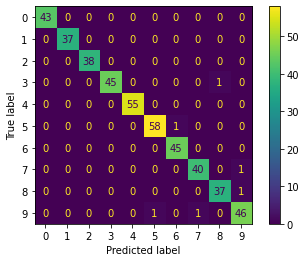

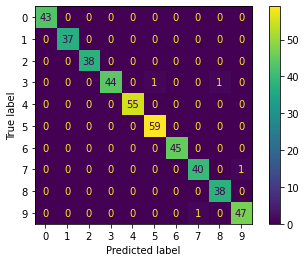

In [31]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svm, X_test, y_test, labels = mnist.target_names)
plot_confusion_matrix(optimal_svm_clf, X_test, y_test, labels = mnist.target_names)

# Support Vector Regressor

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing

In [34]:
housing = fetch_california_housing()

In [36]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [37]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [40]:
housing.target_names

['MedHouseVal']

In [41]:
housing.data[:,5]

array([2.55555556, 2.10984183, 2.80225989, ..., 2.3256351 , 2.12320917,
       2.61698113])

<AxesSubplot:ylabel='Count'>

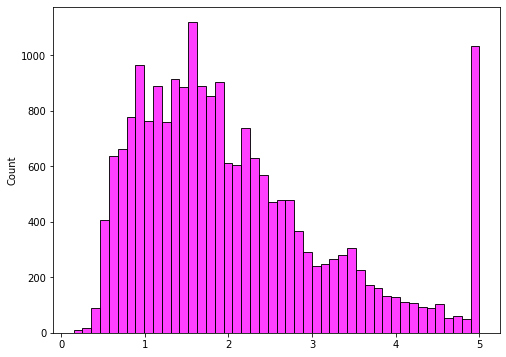

In [78]:
plt.figure(figsize=(8,6))
# plt.hist(housing.target)
sns.histplot(housing.target, color = 'magenta')

In [88]:
X = housing.data
y = housing.target

X_scaled = StandardScaler().fit_transform(X)

In [97]:
lsvr = LinearSVR(epsilon = 0.1, max_iter = 3000)
svr = SVR(epsilon = 0.1)

lsvr.fit(X_scaled, y)
svr.fit(X_scaled, y)

SVR()

TypeError: score() missing 1 required positional argument: 'y'